In [1]:
import numpy as np
import rdkit
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from molreps.graph import MolGraph
from molreps.methods.mol_rdkit import rdkit_add_conformer, rdkit_mol_from_atoms_bonds
import networkx as nx
from molreps.methods.mol_py3d import MolTo3DView
from molreps.methods.mol_pybel import ob_get_bond_table_from_coordinates

In [2]:
atoms = ['H',  'C',  'C',  'H',  'C',  'H',  'C',  'C',  'C',  'H',  'C',  'C',  'C',  'H',  'C',  'H',  'C',  'H',  'C',  'H',
  'N',  'C',  'C',  'H',  'C',  'C',  'H',  'C',  'H',  'C',  'H',  'N',  'C',  'C',  'C',  'H',  'C',  'H',  'C',  'H',
  'C',  'H',  'C',  'C',  'H',  'C',  'H',  'C',  'H',  'C',  'C',  'H']
coords = [[162.443, 151.339, 90.0587], [161.919, 150.673, 90.828], [162.48, 150.419, 92.1125], [163.52, 150.776, 92.3212],
 [161.658, 149.936, 93.1048], [162.19, 149.463, 93.9392], [160.322, 149.646, 92.94], [159.814, 149.86, 91.6296],
 [160.595, 150.398, 90.5824], [160.132, 150.457, 89.5883], [158.625, 149.187, 91.5436], [158.208, 148.627, 92.8209],
 [157.158, 147.697, 92.9649], [156.903, 147.351, 93.9223], [156.509, 147.279, 91.8039], [155.711, 146.525, 91.8914],
 [156.825, 147.809, 90.5316], [156.448, 147.374, 89.6458], [157.886, 148.793, 90.4552], [158.365, 149.106, 89.5204],
 [159.357, 148.918, 93.6737], [159.21, 149.106, 95.1084], [158.011, 149.495, 95.7454], [157.115, 149.089, 95.3264],
 [157.817, 149.989, 97.0231], [159.029, 150.074, 97.8357], [159.057, 150.627, 98.8045], [160.232, 149.683, 97.2797],
 [161.163, 149.675, 97.9014], [160.316, 149.175, 95.9685], [161.29, 148.799, 95.667], [156.859, 150.961, 97.3712],
 [156.117, 151.762, 96.4181], [155.062, 152.453, 97.1315], [154.062, 153.024, 96.3858], [153.303, 153.692, 96.7559],
 [154.109, 152.931, 94.9925], [153.305, 153.347, 94.3858], [155.076, 152.238, 94.3189], [155.049, 152.245, 93.2626],
 [156.116, 151.607, 95.0184], [156.998, 151.333, 94.4559], [155.184, 152.12, 98.4785], [154.651, 152.698, 99.6491],
 [153.587, 153.064, 99.6051], [155.287, 152.628, 100.869], [154.922, 153.188, 101.715], [156.289, 151.63, 101.029],
 [156.777, 151.394, 102.021], [156.759, 150.946, 99.8859], [156.291, 151.208, 98.6074], [157.388, 150.033, 100.009]]

In [3]:
_, _, bondtab, _ = ob_get_bond_table_from_coordinates(atoms,coords)
bondtab[:15]

C:\Users\Patrick\.conda\envs\aimat\lib\openbabel\__init__.py:14: UserWarning: "import openbabel" is deprecated, instead use "from openbabel import openbabel"
  warnings.warn('"import openbabel" is deprecated, instead use "from openbabel import openbabel"')


[[19, 18, 1],
 [9, 8, 1],
 [17, 16, 1],
 [0, 1, 1],
 [18, 16, 1],
 [18, 10, 2],
 [16, 14, 2],
 [8, 1, 2],
 [8, 7, 1],
 [1, 2, 1],
 [10, 7, 1],
 [10, 11, 1],
 [7, 6, 2],
 [14, 15, 1],
 [14, 12, 1]]

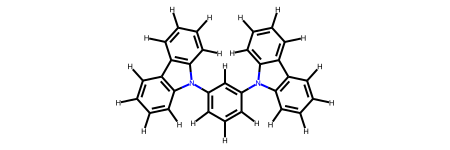

In [4]:
m = rdkit_mol_from_atoms_bonds(atoms, bondtab, coords)
m

In [5]:
m = rdkit_add_conformer(m,coords)
MolTo3DView(m)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [6]:
# Preimplemented features
mgraph = MolGraph(m)
mgraph._mols_implemented

{'rdkit': {'nodes': ['AtomicNum',
   'Symbol',
   'NumExplicitHs',
   'NumImplicitHs',
   'IsAromatic',
   'TotalDegree',
   'TotalValence',
   'Mass',
   'IsInRing',
   'Hybridization',
   'ChiralTag',
   'FormalCharge',
   'ImplicitValence',
   'NumRadicalElectrons'],
  'edges': ['BondType',
   'IsAromatic',
   'IsConjugated',
   'IsInRing',
   'Stereo',
   'Distance'],
  'state': ['NumAtoms', 'ExactMolWt']}}

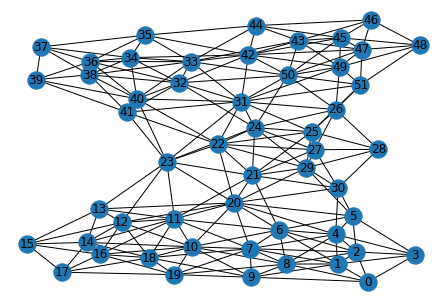

In [7]:
mgraph.make(nodes=['AtomicNum'], 
            edges=['BondType',
                   {'class': 'Distance', 'args': {'bonds_only' : False, "max_distance" : 3}}
                  ],
            state=['NumAtoms'])
nx.draw(mgraph,with_labels=True)

In [8]:
graph_tensors = mgraph.to_tensor(nodes=['AtomicNum'], 
                                edges=['BondType','Distance'],
                                state=['NumAtoms'])
graph_tensors['edges']

array([[ 1.        ,  1.14453243],
       [ 0.        ,  2.25074731],
       [ 0.        ,  2.56822979],
       [ 0.        ,  2.13888913],
       [ 0.        ,  2.51792001],
       [ 1.        ,  1.14453243],
       [12.        ,  1.42449193],
       [ 0.        ,  2.19167886],
       [ 0.        ,  2.40730311],
       [ 0.        ,  2.84001444],
       [ 0.        ,  2.39469342],
       [12.        ,  1.37437999],
       [ 0.        ,  2.18560772],
       [ 0.        ,  2.25074731],
       [12.        ,  1.42449193],
       [ 1.        ,  1.11919824],
       [12.        ,  1.37609313],
       [ 0.        ,  2.0820348 ],
       [ 0.        ,  2.4370575 ],
       [ 0.        ,  2.76644707],
       [ 0.        ,  2.42793575],
       [ 0.        ,  2.56822979],
       [ 0.        ,  2.19167886],
       [ 1.        ,  1.11919824],
       [ 0.        ,  2.18784665],
       [ 0.        ,  2.47200182],
       [ 0.        ,  2.40730311],
       [12.        ,  1.37609313],
       [ 0.        ,

In [9]:
len(graph_tensors['edges'])

426

In [ ]:
[0,0,0,0.1,0.9,0.1,1e-6,0,0,0,0,]